<a href="https://colab.research.google.com/github/hadisbabakhani/MachineLearningproject/blob/main/applied_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hadis B.


# Applied Machine Learning COMP1804

### Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.impute import SimpleImputer
from google.colab import files

def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))



In [ ]:
uploaded = files.upload() # Will prompt you to select file

df = pd.read_csv('OPTION1_uk_road_accident_2019_coursework_final.csv')

### Exploratory Data Analysis

In [ ]:
print(df.shape)

In [ ]:
print(df.columns)

In [ ]:
print(df.dtypes)

In [ ]:
df.head(20)

In [ ]:
df.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical columns
numerical_columns = ['speed_limit', 'age_of_oldest_driver']

# Standardize numerical columns
scaler = StandardScaler()
df_numerical = df[numerical_columns]
df_numerical_std = scaler.fit_transform(df_numerical)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(df_numerical_std)

# Transform data using the PCA model
df_pca = pca.transform(df_numerical_std)

# Create a new DataFrame with the transformed data
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Visualize the transformed data using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# let's list all categorical features
categorical_columns= ['light_conditions','weather_conditions','road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver','accident_severity']

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()




In [ ]:
df.loc[df.accident_severity=='slight','accident_severity'] = 'Slight'
df.loc[df.accident_severity=='fatal','accident_severity'] = 'Fatal'
df.loc[df.accident_severity=='serious','accident_severity'] = 'Serious'

In [ ]:
df.loc[df.speed_limit<0,'speed_limit'] = np.nan
df.loc[df.age_of_oldest_driver<0,'age_of_oldest_driver'] = np.nan


In [ ]:
df.isna().sum()

In [ ]:
df_no_nans =  df.copy()

# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'mean')


# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['age_of_oldest_driver']
imptr_num = imptr_num.fit(df_no_nans[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df_no_nans[numerical_columns] = \
  imptr_num.transform(df_no_nans[numerical_columns]) # apply the transformation using the parameters estimated above

# note column ApplicantIncome in the first row --> before it was a missing value!
df_no_nans


In [ ]:
df_no_nans.isna().sum()

In [ ]:
# 1. Imputer
imptr_empl = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# 2. Fit the imputer object to the feature matrix
imptr_empl = imptr_empl.fit(df_no_nans[['accident_severity']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df_no_nans[['accident_severity']] = imptr_empl.transform(df_no_nans[['accident_severity']])


In [ ]:
df_no_nans = df_no_nans.dropna()

In [ ]:
df_no_nans.isna().sum()

In [ ]:
df_no_nans.loc[df_no_nans.accident_severity=='slight','accident_severity'] = 'Slight'
df_no_nans.loc[df_no_nans.accident_severity=='fatal','accident_severity'] = 'Fatal'
df_no_nans.loc[df_no_nans.accident_severity=='serious','accident_severity'] = 'Serious'

In [ ]:
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
# remove all rows where Married is No or NaN.
# This condition is equivalent to keeping all the rows where Married is Yes
# So, we can filter the dataframe by only keeping those rows that satisfy the condition above
# df_no_nans.drop(df_no_nans[df_no_nans["weather_conditions"] == "data missing or out of range"],axis=0)
# print(df_no_nans[df_no_nans["weather_conditions"] == "data missing or out of range"])
print(df_no_nans.head(100))
df_no_nans
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()



In [ ]:
# print(df_no_nans[df_no_nans["weather_conditions"] == "data missing or out of range"])

df_no_nans = df_no_nans[df_no_nans.weather_conditions != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans.describe()

In [ ]:
df_no_nans = df_no_nans[df_no_nans.road_surface_conditions != "data missing or out of range"]


for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()

df_no_nans.describe()


In [ ]:
df_no_nans = df_no_nans[df_no_nans.vehicle_type != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans = df_no_nans[df_no_nans.skidding_and_overturning != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans.describe()

In [ ]:
df_no_nans.loc[df_no_nans.sex_of_driver=='data missing or out of range','sex_of_driver'] = 'N/A'
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans = df_no_nans[df_no_nans.first_point_of_impact != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans = df_no_nans[df_no_nans.vehicle_leaving_carriageway != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()


In [ ]:
df_no_nans = df_no_nans[df_no_nans.hit_object_off_carriageway != "data missing or out of range"]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_no_nans[col].value_counts())
  print()

In [ ]:
df_no_nans.describe()

In [ ]:
df_no_nans.isna().sum()

In [ ]:
features=df_no_nans[['light_conditions','weather_conditions','road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver','age_of_oldest_driver','speed_limit']]
labels=df_no_nans[['accident_severity']]
print(features)
print(labels)


In [ ]:
from sklearn.model_selection import train_test_split


train_dataset, test_dataset, train_labels, test_labels = train_test_split(features, labels, test_size= 0.2)
print(train_dataset.shape)
print(test_dataset.shape)
print(train_labels.shape)
print(test_labels.shape)
# shape of output:
# The number or rows is the number of data points (should be the same as before!)
# The number or columns is the number of labels we want to predict



### Data Pre Processing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns= ['light_conditions','weather_conditions','road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver']

# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply
            categorical_columns, #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct_cat.fit_transform(train_dataset)

# What if we want a dataframe back? We can combine the array with the info about
# the original and transformed column names.
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct_cat.get_feature_names_out() #remember python's dot notation
print(encoded_col_names) #note the combined name: original column + category (e.g. Gender_Female)

train_dataset = pd.DataFrame(encoded_array, columns=encoded_col_names)



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns= ['light_conditions','weather_conditions','road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver']

# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply
            categorical_columns, #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct_cat.fit_transform(test_dataset)

# What if we want a dataframe back? We can combine the array with the info about
# the original and transformed column names.
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct_cat.get_feature_names_out() #remember python's dot notation
print(encoded_col_names) #note the combined name: original column + category (e.g. Gender_Female)

test_dataset = pd.DataFrame(encoded_array, columns=encoded_col_names)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()

# apply LblEncoder object to our target variables
train_encoded_labels = lblEncoder_Y.fit_transform(train_labels['accident_severity'])

for i in range(0,10):
  print(train_encoded_labels[i])

print(train_labels.head(10))
# print(train_encoded_labels.head(20))


In [ ]:
# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()

# apply LblEncoder object to our target variables
test_encoded_labels = lblEncoder_Y.fit_transform(test_labels['accident_severity'])

for i in range(0,10):
  print(test_encoded_labels[i])

print(test_labels.head(10))
# print(train_encoded_labels.head(20))


In [ ]:
# create the Scaling object
from sklearn.preprocessing import StandardScaler
my_scaler_num = StandardScaler()
numerical_columns = ['age_of_oldest_driver','speed_limit']

# fit and transform the appropriate columns in the training data
train_dataset[numerical_columns]= my_scaler_num.fit_transform(train_dataset[numerical_columns])
print(train_dataset)

# show results
print(train_dataset[numerical_columns].head())

print(train_dataset.isna().sum())

In [ ]:
my_scaler_num = StandardScaler()
numerical_columns = ['age_of_oldest_driver','speed_limit']

# fit and transform the appropriate columns in the training data
test_dataset[numerical_columns]= my_scaler_num.fit_transform(test_dataset[numerical_columns])
print(test_dataset)

# show results
print(test_dataset[numerical_columns].head())

print(test_dataset.isna().sum())

### Traditional Machine Learning Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from time import time as tt

In [ ]:
print(test_dataset.columns)

In [ ]:
print(train_dataset.columns)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(train_dataset, train_encoded_labels) #train_labels['Target'])
## we train the classifier with the training data and labels: train_dataset_no_nans1 should be the training dataframe after:
## i) filling in all missing values, ii) encoding all categorical features and (maybe) after feature scaling

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=18)

# Evaluate the model with cross-validation
scores = cross_val_score(knn, train_dataset, train_encoded_labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Fit the model on the entire training set
knn.fit(train_dataset, train_encoded_labels)

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=25)

# Evaluate the model with cross-validation
scores = cross_val_score(knn, train_dataset, train_encoded_labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Fit the model on the entire training set
knn.fit(train_dataset, train_encoded_labels)

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=30)

# Evaluate the model with cross-validation
scores = cross_val_score(knn, train_dataset, train_encoded_labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Fit the model on the entire training set
knn.fit(train_dataset, train_encoded_labels)

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=37)

# Evaluate the model with cross-validation
scores = cross_val_score(knn, train_dataset, train_encoded_labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Fit the model on the entire training set
knn.fit(train_dataset, train_encoded_labels)

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create the classifier
dtc = DecisionTreeClassifier()

# fit the classifier to the training data
dtc.fit(train_dataset, train_encoded_labels)

# make predictions on the test data
predictions = dtc.predict(test_dataset)

# evaluate the performance of the classifier
performance = accuracy_score(test_encoded_labels, predictions)

print(f'Performance is {performance:.3f}')




In [ ]:
# Decision tree tune hyperparameter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# create the classifier
dtc = DecisionTreeClassifier()

# define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)
grid_search.fit(train_dataset, train_encoded_labels)

# make predictions on the test data using the best estimator found by the grid search
best_dtc = grid_search.best_estimator_
predictions = best_dtc.predict(test_dataset)

# evaluate the performance of the classifier
performance = accuracy_score(test_encoded_labels, predictions)

print(f'Performance is {performance:.3f}')


In [ ]:
# Decision tree changed HP

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create the classifier with desired hyperparameters
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=2)

# fit the classifier to the training data
dtc.fit(train_dataset, train_encoded_labels)

# make predictions on the test data
predictions = dtc.predict(test_dataset)

# evaluate the performance of the classifier
performance = accuracy_score(test_encoded_labels, predictions)

print(f'Performance is {performance:.3f}')


In [ ]:
# Decision tree best params

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameter space to search
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the grid search object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(train_dataset, train_encoded_labels)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, random_state=42)

# Fit the random forest classifier to the training data
rf.fit(train_dataset, train_encoded_labels)

# Evaluate the performance of the random forest classifier on the test data
accuracy = rf.score(test_dataset, test_encoded_labels)
print(f"Random forest accuracy: {accuracy:.3f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter space to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the grid search object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

# Fit the grid search object to the training data
grid_search.fit(train_dataset, train_encoded_labels)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

# Evaluate the performance of the random forest classifier on the test data using the best hyperparameters
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(train_dataset, train_encoded_labels)
accuracy = rf_best.score(test_dataset, test_encoded_labels)
print(f"Random forest accuracy with best hyperparameters: {accuracy:.3f}")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Evaluate the model with cross-validation
scores = cross_val_score(svm, train_dataset, train_encoded_labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Fit the model on the entire training set
svm.fit(train_dataset, train_encoded_labels)

# Checking the model's accuracy (performance) on the test set
performance = svm.score(test_dataset, test_encoded_labels)

print(f'Performance is {performance:.3f}')


In [ ]:
from sklearn.svm import SVC

# Define the SVM classifier with custom hyperparameters
svm = SVC(C=10, kernel='rbf', gamma=0.1, random_state=42)

# Fit the model on the training set
svm.fit(train_dataset, train_encoded_labels)

# Evaluate the model on the test set
accuracy = svm.score(test_dataset, test_encoded_labels)

print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.761


In [ ]:

# Define the SVM classifier with custom hyperparameters
svm = SVC(C=5, kernel='rbf', gamma=0.1, random_state=42)

# Fit the model on the training set
svm.fit(train_dataset, train_encoded_labels)

# Evaluate the model on the test set
accuracy = svm.score(test_dataset, test_encoded_labels)

print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.761


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the trained model to predict on test data
test_pred = svm.predict(test_dataset)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_encoded_labels, test_pred)
precision = precision_score(test_encoded_labels, test_pred, average='micro')
recall = recall_score(test_encoded_labels, test_pred, average='micro')
f1 = f1_score(test_encoded_labels, test_pred, average='micro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")



Accuracy: 0.761
Precision: 0.761
Recall: 0.761
F1 Score: 0.761


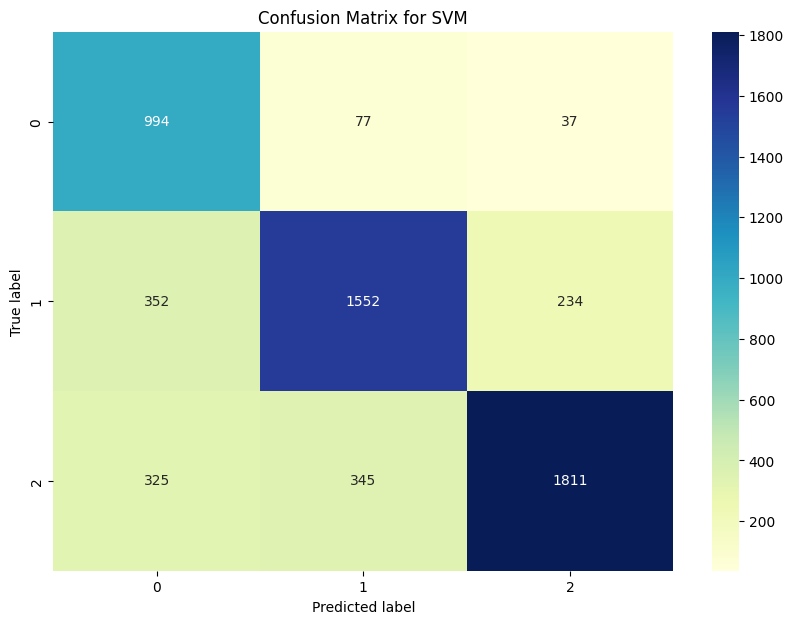

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 7))
cm = confusion_matrix(test_encoded_labels, test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])



algorithm_name = 'SVM'
plt.title(f'Confusion Matrix for {algorithm_name}')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.show()


In [ ]:
# Define the SVM classifier with custom hyperparameters
svm = SVC( kernel='rbf', gamma=0.1, random_state=42)

# Fit the model on the training set
svm.fit(train_dataset, train_encoded_labels)

# Evaluate the model on the test set
accuracy = svm.score(test_dataset, test_encoded_labels)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.761


In [ ]:
import numpy as np

# Find the most frequent class in the training set
majority_class = np.bincount(train_encoded_labels).argmax()

# Predict the majority class for all instances in the test set
majority_pred_labels = np.full_like(test_encoded_labels, fill_value=majority_class)

# Compute the accuracy of the majority class baseline
majority_accuracy = (test_encoded_labels == majority_pred_labels).mean()

print(f"Majority class baseline accuracy: {majority_accuracy:.3f}")



Majority class baseline accuracy: 0.433


### Neural Network

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.utils import class_weight

scaler = StandardScaler()

scaler = StandardScaler()

X_train = scaler.fit_transform(train_dataset)

X_test = scaler.transform(test_dataset)




y_train = train_encoded_labels

y_test = test_encoded_labels
hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

model=Sequential()
model.add(layers.Input(shape=(num_of_input_features,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
learning_rate = 0.01 # change to 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
batch_size = 64
epochs = 100
validation_split = 0.2
# compute class weights to counteract data imbalance

# compute class weights to counteract data imbalance

class_weights = class_weight.compute_class_weight(
    class_weight= "balanced",
    classes = np.unique(train_encoded_labels),
    y = train_encoded_labels)

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(train_encoded_labels), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)


history = model.fit(X_train,
                    y_train_oh,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= validation_split,
                    class_weight= class_weights)

print(model.summary())

# as metric we choose the accuracy: the total number of correct predictions made
# Adam is a typical choice for an optimizer and tends to perform well in practice
# the most typical choice for the loss function is the binary cross entropy since
# we are solving a binary classification task. If we were solving a multi-class classification
# task, we'd choose the categorical cross entropy (that is, the more general version)
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# let's print a summary of the model to see what it's like
print(model.summary())

{0: 1.6362337476782398, 1: 0.9066223330562483, 2: 0.777698550134121}
Epoch 1/100
287/287 [==============================] - 2s 3ms/step - loss: 0.6828 - accuracy: 0.7341 - val_loss: 0.6582 - val_accuracy: 0.7446
Epoch 2/100
287/287 [==============================] - 1s 2ms/step - loss: 0.6383 - accuracy: 0.7526 - val_loss: 0.6532 - val_accuracy: 0.7503
Epoch 3/100
287/287 [==============================] - 1s 2ms/step - loss: 0.6328 - accuracy: 0.7535 - val_loss: 0.6608 - val_accuracy: 0.7551
Epoch 4/100
287/287 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.7542 - val_loss: 0.6914 - val_accuracy: 0.7518
Epoch 5/100
287/287 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.7553 - val_loss: 0.6581 - val_accuracy: 0.7568
Epoch 6/100
287/287 [==============================] - 1s 2ms/step - loss: 0.6269 - accuracy: 0.7565 - val_loss: 0.6921 - val_accuracy: 0.7490
Epoch 7/100
287/287 [==============================] - 1s 2ms/step - loss

In [ ]:
y_train = train_encoded_labels

y_test = test_encoded_labels
hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

model=Sequential()
model.add(layers.Input(shape=(num_of_input_features,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
batch_size = 32
epochs = 50
validation_split = 0.2
# compute class weights to counteract data imbalance

# compute class weights to counteract data imbalance

class_weights = class_weight.compute_class_weight(
    class_weight= "balanced",
    classes = np.unique(train_encoded_labels),
    y = train_encoded_labels)

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(train_encoded_labels), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)


history = model.fit(X_train,
                    y_train_oh,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= validation_split,
                    class_weight= class_weights)

print(model.summary())

{0: 1.6362337476782398, 1: 0.9066223330562483, 2: 0.777698550134121}
Epoch 1/50
573/573 [==============================] - 2s 3ms/step - loss: 0.8229 - accuracy: 0.6657 - val_loss: 0.7175 - val_accuracy: 0.7341
Epoch 2/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6603 - accuracy: 0.7456 - val_loss: 0.6841 - val_accuracy: 0.7446
Epoch 3/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6445 - accuracy: 0.7503 - val_loss: 0.6806 - val_accuracy: 0.7474
Epoch 4/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6363 - accuracy: 0.7534 - val_loss: 0.6647 - val_accuracy: 0.7514
Epoch 5/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6311 - accuracy: 0.7547 - val_loss: 0.6635 - val_accuracy: 0.7531
Epoch 6/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6273 - accuracy: 0.7562 - val_loss: 0.6703 - val_accuracy: 0.7520
Epoch 7/50
573/573 [==============================] - 2s 3ms/step - loss: 0.625

In [ ]:
y_train = train_encoded_labels

y_test = test_encoded_labels
hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


hidden_layer_nodes = 20
num_of_input_features = X_train.shape[1]

model=Sequential()
model.add(layers.Input(shape=(num_of_input_features,)))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(3, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
batch_size = 32
epochs = 50
validation_split = 0.2
# compute class weights to counteract data imbalance

# compute class weights to counteract data imbalance

class_weights = class_weight.compute_class_weight(
    class_weight= "balanced",
    classes = np.unique(train_encoded_labels),
    y = train_encoded_labels)

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(train_encoded_labels), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)


history = model.fit(X_train,
                    y_train_oh,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= validation_split,
                    class_weight= class_weights)

print(model.summary())

{0: 1.6362337476782398, 1: 0.9066223330562483, 2: 0.777698550134121}
Epoch 1/50
573/573 [==============================] - 2s 3ms/step - loss: 0.7749 - accuracy: 0.6931 - val_loss: 0.6958 - val_accuracy: 0.7424
Epoch 2/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6634 - accuracy: 0.7484 - val_loss: 0.6868 - val_accuracy: 0.7483
Epoch 3/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.7508 - val_loss: 0.6744 - val_accuracy: 0.7483
Epoch 4/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.7529 - val_loss: 0.6670 - val_accuracy: 0.7514
Epoch 5/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.7544 - val_loss: 0.6621 - val_accuracy: 0.7503
Epoch 6/50
573/573 [==============================] - 1s 2ms/step - loss: 0.6303 - accuracy: 0.7541 - val_loss: 0.6618 - val_accuracy: 0.7540
Epoch 7/50
573/573 [==============================] - 1s 2ms/step - loss: 0.626

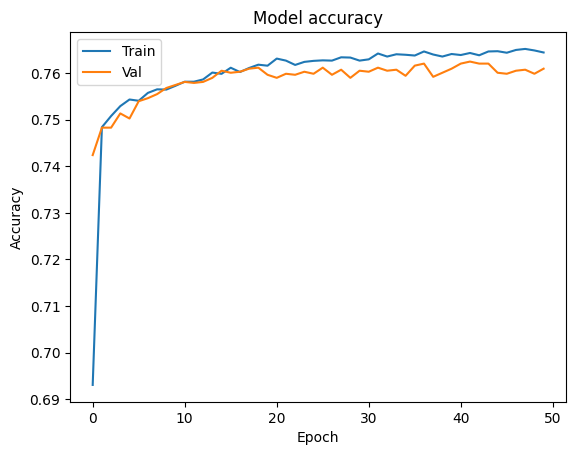

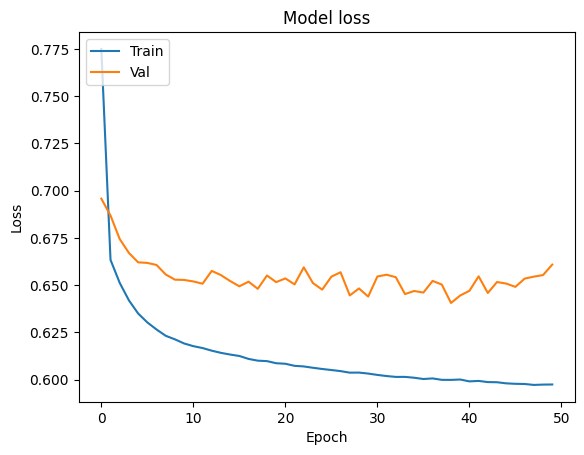

In [ ]:
import matplotlib.pyplot as plt

# plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# make predictions on the test set
y_pred = model.predict(X_test)

# convert predicted probabilities to predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion matrix:")
print(cm)

# calculate precision and recall
precision = precision_score(y_test, y_pred_labels, average='macro')
recall = recall_score(y_test, y_pred_labels, average='macro')
print("Precision:", precision)
print("Recall:", recall)


179/179 [==============================] - 0s 1ms/step
Confusion matrix:
[[1036   39   33]
 [ 387 1511  240]
 [ 344  334 1803]]
Precision: 0.7522728552730499
Recall: 0.7894921375572723


In [ ]:
import numpy as np

# create a random guess classifier
class RandomGuess:
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def predict(self, X):
        return np.random.randint(self.num_classes, size=X.shape[0])

# evaluate the random guess classifier
rg = RandomGuess(num_classes=3)
rg_pred = rg.predict(X_test)
rg_acc = accuracy_score(y_test, rg_pred)

# evaluate the model performance
model_pred = np.argmax(model.predict(X_test), axis=1)
model_acc = accuracy_score(y_test, model_pred)

# print the results
print(f"Random Guess Accuracy: {rg_acc:.4f}")
print(f"Model Accuracy: {model_acc:.4f}")


179/179 [==============================] - 0s 1ms/step
Random Guess Accuracy: 0.3304
Model Accuracy: 0.7596
